In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 


In [7]:
final_data = pd.read_csv("final_data.csv")
final_data.drop(labels="Unnamed: 0", axis="columns", inplace=True)
final_data

,Season_x,HomeTeam_x,AwayTeam_x,HomePossession,AwayPossession,HomeTouches,AwayTouches,HomePasses,AwayPasses,HomeTackles,...,HomeYellowCards,HomeRedCards,AwayGoals,AwayGoalsHalftime,AwayShots,AwayShotsOnTarget,AwayCorners,AwayFouls,AwayYellowCards,AwayRedCards
0,2010/11,Aston Villa,West Ham United,56.8,43.2,636,529,395,313,27,...,1,0,0,0,12,2,7,15,2,0
1,2010/11,Blackburn Rovers,Everton,30.4,69.6,450,729,208,469,15,...,2,0,0,0,17,12,3,14,1,0
2,2010/11,Bolton Wanderers,Fulham,46.5,53.5,592,636,336,394,26,...,1,0,0,0,12,7,8,13,3,0
3,2010/11,Chelsea,West Bromwich Albion,59.5,40.5,782,571,592,394,16,...,1,0,0,0,10,4,1,10,0,0
4,2010/11,Sunderland,Birmingham City,44.1,55.9,514,581,304,386,9,...,3,1,2,0,13,7,6,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017/18,Newcastle United,Chelsea,41.9,58.1,585,764,406,569,19,...,0,0,0,0,6,2,2,10,1,0
3036,2017/18,Southampton,Manchester City,30.3,69.7,441,782,259,583,24,...,3,0,1,0,13,2,12,10,1,0
3037,2017/18,Swansea City,Stoke City,57.6,42.4,744,612,544,414,16,...,1,0,2,2,8,5,0,9,2,0
3038,2017/18,Tottenham Hotspur,Leicester City,64.0,36.0,672,453,480,265,20,...,1,0,4,2,16,9,4,13,2,0


In [8]:
#Extracting variables that could affect home goals
HomeData = pd.DataFrame(final_data[["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget", "HomeGoals"]])
HomeData

,HomePossession,HomeTouches,HomePasses,HomeTackles,HomeClearances,HomeOffsides,HomeShots,HomeShotsOnTarget,HomeGoals
0,56.8,636,395,27,24,1,23,11,3
1,30.4,450,208,15,48,3,7,2,1
2,46.5,592,336,26,54,5,13,9,0
3,59.5,782,592,16,10,3,18,13,6
4,44.1,514,304,9,49,2,6,2,2
...,...,...,...,...,...,...,...,...,...
3035,41.9,585,406,19,10,0,16,6,3
3036,30.3,441,259,24,30,4,8,3,0
3037,57.6,744,544,16,4,1,26,11,1
3038,64.0,672,480,20,17,2,14,6,5


# Model 1: Simple Multivariate Linear Regression to predict goals

#### **Response: HomeGoals**
####  **Predictors: Every other column in the cleaned HomeData data. See predictors below.**

In [9]:
Model_1_predictors = HomeData.drop(columns="HomeGoals")
Model_1_response = HomeData["HomeGoals"]
Model_1_predictors

,HomePossession,HomeTouches,HomePasses,HomeTackles,HomeClearances,HomeOffsides,HomeShots,HomeShotsOnTarget
0,56.8,636,395,27,24,1,23,11
1,30.4,450,208,15,48,3,7,2
2,46.5,592,336,26,54,5,13,9
3,59.5,782,592,16,10,3,18,13
4,44.1,514,304,9,49,2,6,2
...,...,...,...,...,...,...,...,...
3035,41.9,585,406,19,10,0,16,6
3036,30.3,441,259,24,30,4,8,3
3037,57.6,744,544,16,4,1,26,11
3038,64.0,672,480,20,17,2,14,6


### Model Training

In [10]:
#Setting up the regresion problem with Train and Test datasets
#Change this to KFolds cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Model_1_predictors, Model_1_response, random_state = 40, test_size = 0.25)

from sklearn.linear_model import LinearRegression

#Don't think should use regression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

for i,x in enumerate(["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget"]):
  print('Coefficient of ' +x + ' (times 1000):\t: ', linreg.coef_[i]*1000)
print()

# Print the Coefficients against Predictors




Intercept of Regression 	: b =  1.6562849791701726

Coefficient of HomePossession (times 1000):	:  -14.69234492470909
Coefficient of HomeTouches (times 1000):	:  -9.64829829696067
Coefficient of HomePasses (times 1000):	:  11.717850497555025
Coefficient of HomeTackles (times 1000):	:  14.521979100089414
Coefficient of HomeClearances (times 1000):	:  11.741204486041044
Coefficient of HomeOffsides (times 1000):	:  15.137778678294767
Coefficient of HomeShots (times 1000):	:  5.82236831638937
Coefficient of HomeShotsOnTarget (times 1000):	:  175.72291998552032



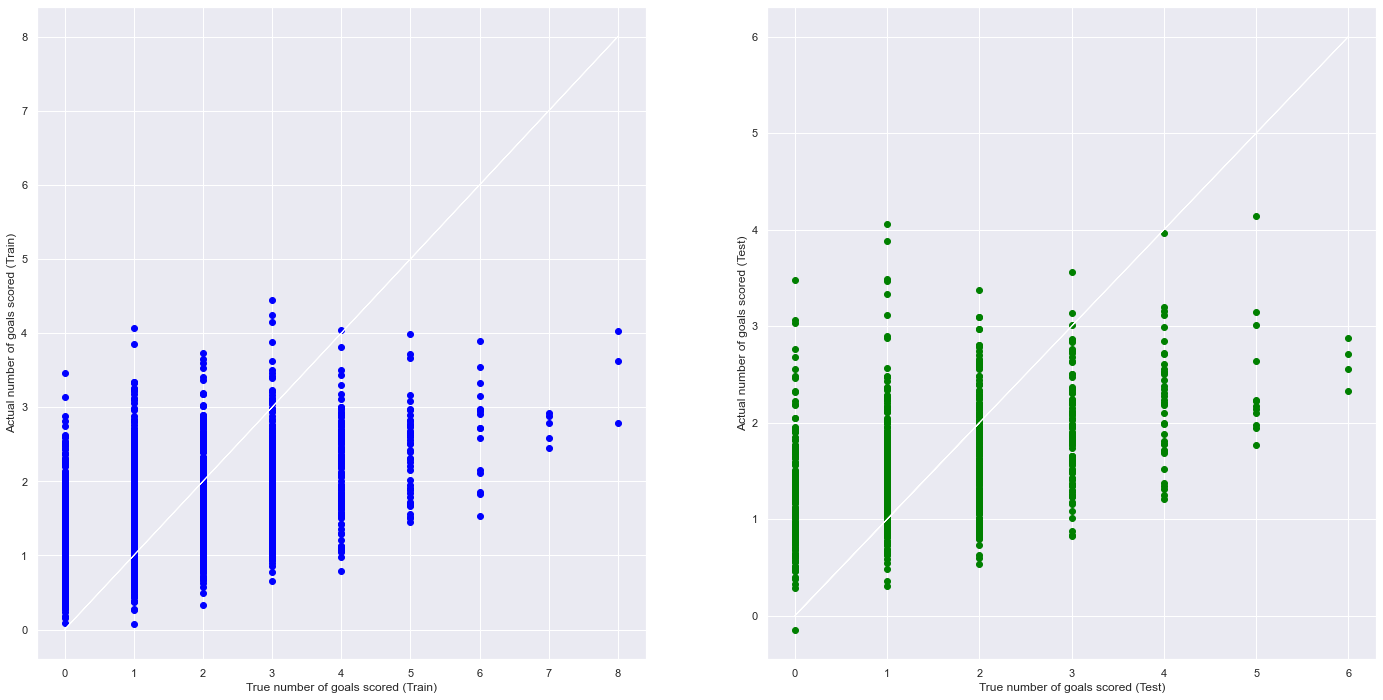

In [11]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True number of goals scored (Train)")
axes[0].set_ylabel("Actual number of goals scored (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True number of goals scored (Test)")
axes[1].set_ylabel("Actual number of goals scored (Test)")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.24585267882156603
Mean Squared Error (MSE) 	: 1.3240264390971843

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1830047327755332
Mean Squared Error (MSE) 	: 1.250544499136237



## **Insights**

**Goal Prediction:**

Rather surprisingly, our model did not do too well - the explained variance only had an R^2 value of around 0.18 for predicting goals from the above data. For this, maybe it will be more useful to try another model. Lets try *Model 2: Random Forest* next to find a better way to predict goals!

**Feature importance:**

As we can see from the above model, the variable with the highest coefficient is Shots On Target. So our recommendation to football teams is to take more shots, and make sure that they are on target.

Well... that a bit obvious. If you take more shots (on target), you score more goals. Well, lets try to recommend something more interesting for teams. Lets try to re-formulate the problem into *problem 2*. 

But first, let's try our Random Forest model:

# Model 2: Random Forest

#### **Response: Same as Model 1**
#### **Predictors: Same as Model 1**

### Model Training

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


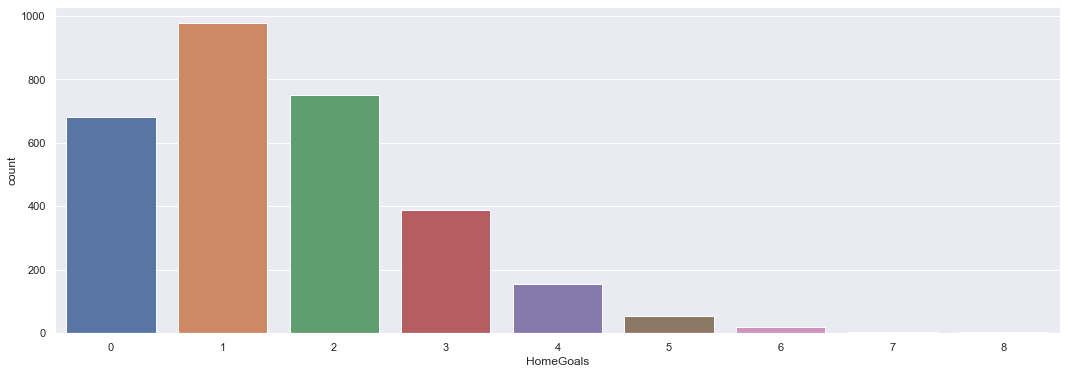

In [13]:
y = pd.DataFrame(Model_1_response.astype('category'))
f = plt.figure(figsize=(18, 6))
sb.countplot(y['HomeGoals'])

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


predictors = ["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget"]
X = pd.DataFrame(final_data[predictors])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)
rforest = GridSearchCV(RandomForestClassifier(max_depth = 4), {
  "n_estimators": [100, 200, 300],
},cv = 5) ##Can change the parameters here

rforest.fit(X_train, y_train.values.ravel()) 
df = pd.DataFrame(rforest.cv_results_)
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)



### Model Performance

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4004385964912281

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3631578947368421



<AxesSubplot:>

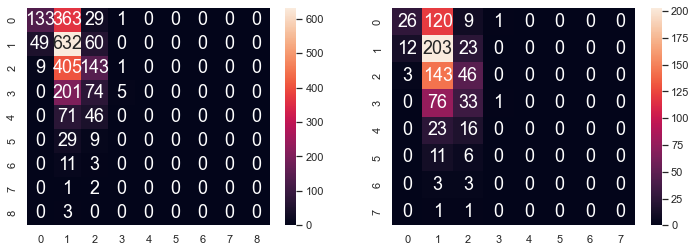

In [14]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

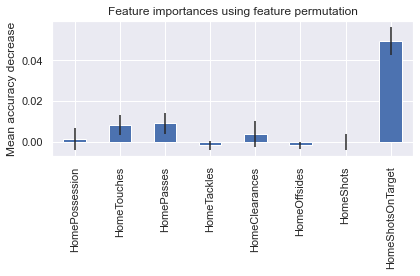

In [15]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rforest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=predictors)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using feature permutation")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


## **Insights**

This model features much better performance than Linear Regression, with an R^2 value of 0.353, much higher than 0.18 for Model 1. Thus, for *Problem 1: Predicting Goals* we recommend using this random forest model in order to predict the number of goals socred in a match.

As for *Problem 2: Feature Importance*, we can see that, similiar to Model 1, the feature importance for HomeShotsOnTarget dwarfs all other variables.

# Problem Formulation 2

Even if Random Forest is pretty okay at predicting goals from the other variables, the model may not be super useful to football players and football coaches - it may be used by Sports Data Analysts and Data Scientists, but not much beyond that. 

We want to find insights that are more useful to football teams to win football matches (that is why we first tried our feature importance approach).

Maybe there is some pattern in the data that we can't discern by eye?